In [37]:
import os
import numpy as np
import pandas as pd
import matplotlib
# import mplfinance as mpf
import asyncio
import plotly.express as px
from pathlib import Path
import time as t
import threading
import requests
from requests import Request, Session
import datetime
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

%matplotlib inline

In [38]:
from dotenv import load_dotenv
load_dotenv()
cmc_key = os.getenv('CMC_KEY')

***_INDEX TOKENS_***

In [39]:
# Request data from Kuc API & Convert to Json
btc = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=BTC-USDT&startAt=1620360000&endAt=0')
btc_j = btc.json()

# Convert json to DataFrame
btc_df = pd.DataFrame(btc_j['data'])

# Rename Date, Open, & Close columns and remove others
btc_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)

btc_df.drop(columns = [3,4,5,6], inplace=True)

# Create A DF with Median Price 

btc_median = btc_df[['Open','Close']].astype(float)

btc_median['BTC Median'] = btc_median[['Open','Close']].mean(axis=1)
btc_median = btc_median['BTC Median']

btc_df_date = pd.to_datetime(btc_df['Date'], unit='s')
btc_date = [btc_df_date, btc_median]
btc_result = pd.concat(btc_date, axis=1, join = 'outer')
btc_plot = btc_result.set_index('Date')
btc_result.set_index('Date', inplace=True)

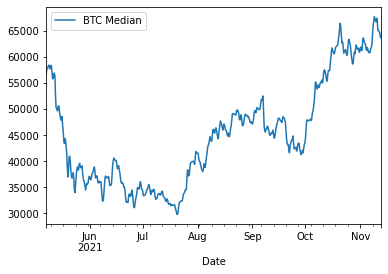

In [40]:
btc_plot.plot();

In [41]:
eth = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=ETH-USDT&startAt=1620360000&endAt=0')
eth_j = eth.json()
eth_df = pd.DataFrame(eth_j['data'])
eth_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
eth_df.drop(columns = [3,4,5,6], inplace=True)
eth_median = eth_df[['Open','Close']].astype(float)
eth_median['ETH Median'] = eth_median[['Open','Close']].mean(axis=1)
eth_median = eth_median['ETH Median']
eth_df_date = pd.to_datetime(eth_df['Date'], unit='s')
eth_date = [eth_df_date, eth_median]
eth_result = pd.concat(eth_date, axis=1, join = 'outer')
eth_result.set_index('Date', inplace=True)

In [42]:
bnb = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=BNB-USDT&startAt=1620360000&endAt=0')
bnb_j = bnb.json()
bnb_df = pd.DataFrame(bnb_j['data'])
bnb_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
bnb_df.drop(columns = [3,4,5,6], inplace=True)
bnb_median = bnb_df[['Open','Close']].astype(float)
bnb_median['BNB Median'] = bnb_median[['Open','Close']].mean(axis=1)
bnb_median = bnb_median['BNB Median']
bnb_df_date = pd.to_datetime(bnb_df['Date'], unit='s')
bnb_date = [bnb_df_date, bnb_median]
bnb_result = pd.concat(bnb_date, axis=1, join = 'outer')
bnb_result.set_index('Date', inplace=True)

In [43]:
doge = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=DOGE-USDT&startAt=1620360000&endAt=0')
doge_j = doge.json()
doge_df = pd.DataFrame(doge_j['data'])
doge_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
doge_df.drop(columns = [3,4,5,6], inplace=True)
doge_median = doge_df[['Open','Close']].astype(float)
doge_median['DOGE Median'] = doge_median[['Open','Close']].mean(axis=1)
doge_median = doge_median['DOGE Median']
doge_df_date = pd.to_datetime(doge_df['Date'], unit='s')
doge_date = [doge_df_date, doge_median]
doge_result = pd.concat(doge_date, axis=1, join = 'outer')
doge_result.set_index('Date', inplace=True)

In [44]:
ltc = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=LTC-USDT&startAt=1620360000&endAt=0')
ltc_j = ltc.json()
ltc_df = pd.DataFrame(ltc_j['data'])
ltc_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
ltc_df.drop(columns = [3,4,5,6], inplace=True)
ltc_median = ltc_df[['Open','Close']].astype(float)
ltc_median['LTC Median'] = ltc_median[['Open','Close']].mean(axis=1)
ltc_median = ltc_median['LTC Median']
ltc_df_date = pd.to_datetime(ltc_df['Date'], unit='s')
ltc_date = [ltc_df_date, ltc_median]
ltc_result = pd.concat(ltc_date, axis=1, join = 'outer')
ltc_result.set_index('Date', inplace=True)

In [45]:
ada = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=ADA-USDT&startAt=1620360000&endAt=0')
ada_j = ada.json()
ada_df = pd.DataFrame(ada_j['data'])
ada_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
ada_df.drop(columns = [3,4,5,6], inplace=True)
ada_median = ada_df[['Open','Close']].astype(float)
ada_median['ADA Median'] = ada_median[['Open','Close']].mean(axis=1)
ada_median = ada_median['ADA Median']
ada_df_date = pd.to_datetime(ada_df['Date'], unit='s')
ada_date = [ada_df_date, ada_median]
ada_result = pd.concat(ada_date, axis=1, join = 'outer')
ada_result.set_index('Date', inplace=True)

In [46]:
xrp = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=XRP-USDT&startAt=1620360000&endAt=0')
xrp_j = xrp.json()
xrp_df = pd.DataFrame(xrp_j['data'])
xrp_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
xrp_df.drop(columns = [3,4,5,6], inplace=True)
xrp_median = xrp_df[['Open','Close']].astype(float)
xrp_median['XRP Median'] = xrp_median[['Open','Close']].mean(axis=1)
xrp_median = xrp_median['XRP Median']
xrp_df_date = pd.to_datetime(xrp_df['Date'], unit='s')
xrp_date = [xrp_df_date, xrp_median]
xrp_result = pd.concat(xrp_date, axis=1, join = 'outer')
xrp_result.set_index('Date', inplace=True)

In [47]:
usdt = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=USDT-USDC&startAt=1620360000&endAt=0')
usdt_j = usdt.json()
usdt_df = pd.DataFrame(usdt_j['data'])
usdt_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
usdt_df.drop(columns = [3,4,5,6], inplace=True)
usdt_median = usdt_df[['Open','Close']].astype(float)
usdt_median['USDT Median'] = usdt_median[['Open','Close']].mean(axis=1)
usdt_median = usdt_median['USDT Median']
usdt_df_date = pd.to_datetime(usdt_df['Date'], unit='s')
usdt_date = [usdt_df_date, usdt_median]
usdt_result = pd.concat(usdt_date, axis=1, join = 'outer')
usdt_result.set_index('Date', inplace=True)

In [48]:
link = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=LINK-USDT&startAt=1620360000&endAt=0')
link_j = link.json()
link_df = pd.DataFrame(link_j['data'])
link_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
link_df.drop(columns = [3,4,5,6], inplace=True)
link_median = link_df[['Open','Close']].astype(float)
link_median['LINK Median'] = link_median[['Open','Close']].mean(axis=1)
link_median = link_median['LINK Median']
link_df_date = pd.to_datetime(link_df['Date'], unit='s')
link_date = [link_df_date, link_median]
link_result = pd.concat(link_date, axis=1, join = 'outer')
link_result.set_index('Date', inplace=True)

In [49]:
uni = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=UNI-USDT&startAt=1620360000&endAt=0')
uni_j = uni.json()
uni_df = pd.DataFrame(uni_j['data'])
uni_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
uni_df.drop(columns = [3,4,5,6], inplace=True)
uni_median = uni_df[['Open','Close']].astype(float)
uni_median['UNI Median'] = uni_median[['Open','Close']].mean(axis=1)
uni_median = uni_median['UNI Median']
uni_df_date = pd.to_datetime(uni_df['Date'], unit='s')
uni_date = [uni_df_date, uni_median]
uni_result = pd.concat(uni_date, axis=1, join = 'outer')
uni_result.set_index('Date', inplace=True)

In [50]:
dot = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=DOT-USDT&startAt=1620360000&endAt=0')
dot_j = dot.json()
dot_df = pd.DataFrame(dot_j['data'])
dot_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
dot_df.drop(columns = [3,4,5,6], inplace=True)
dot_median = dot_df[['Open','Close']].astype(float)
dot_median['DOT Median'] = dot_median[['Open','Close']].mean(axis=1)
dot_median = dot_median['DOT Median']
dot_df_date = pd.to_datetime(dot_df['Date'], unit='s')
dot_date = [dot_df_date, dot_median]
dot_result = pd.concat(dot_date, axis=1, join = 'outer')
dot_result.set_index('Date', inplace=True)

In [51]:
#sol = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=SOL-USDT&startAt=1620360000&endAt=0')
sol = requests.get('https://api.binance.com/api/v3/klines?symbol=SOLUSDT&interval=8h&startTime=1620360000000&limit=666')
sol_j = sol.json()
sol_df = pd.DataFrame(sol_j)
sol_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
sol_df.drop(columns = [3,4,5,6], inplace=True)
sol_median = sol_df[['Open','Close']].astype(float)
sol_median['SOL Median'] = sol_median[['Open','Close']].mean(axis=1)
sol_median = sol_median['SOL Median']
sol_df_date = pd.to_datetime(sol_df['Date'], unit='ms')
sol_date = [sol_df_date, sol_median]
sol_result = pd.concat(sol_date, axis=1, join = 'outer')
sol_result.set_index('Date', inplace=True)
#sol_result.to_csv('sol_result.csv')

In [52]:
luna = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=LUNA-USDT&startAt=1620360000&endAt=0')
luna_j = luna.json()
luna_df = pd.DataFrame(luna_j['data'])
luna_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
luna_df.drop(columns = [3,4,5,6], inplace=True)
luna_median = luna_df[['Open','Close']].astype(float)
luna_median['LUNA Median'] = luna_median[['Open','Close']].mean(axis=1)
luna_median = luna_median['LUNA Median']
luna_df_date = pd.to_datetime(luna_df['Date'], unit='s')
luna_date = [luna_df_date, luna_median]
luna_result = pd.concat(luna_date, axis=1, join = 'outer')
luna_result.set_index('Date', inplace=True)

In [53]:
avax = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=AVAX-USDT&startAt=1620360000&endAt=0')
avax_j = avax.json()
avax_df = pd.DataFrame(avax_j['data'])
avax_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
avax_df.drop(columns = [3,4,5,6], inplace=True)
avax_median = avax_df[['Open','Close']].astype(float)
avax_median['AVAX Median'] = avax_median[['Open','Close']].mean(axis=1)
avax_median = avax_median['AVAX Median']
avax_df_date = pd.to_datetime(avax_df['Date'], unit='s')
avax_date = [avax_df_date, avax_median]
avax_result = pd.concat(avax_date, axis=1, join = 'outer')
avax_result.set_index('Date', inplace=True)

In [54]:
algo = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=ALGO-USDT&startAt=1620360000&endAt=0')
algo_j = algo.json()
algo_df = pd.DataFrame(algo_j['data'])
algo_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
algo_df.drop(columns = [3,4,5,6], inplace=True)
algo_median = algo_df[['Open','Close']].astype(float)
algo_median['ALGO Median'] = algo_median[['Open','Close']].mean(axis=1)
algo_median = algo_median['ALGO Median']
algo_df_date = pd.to_datetime(algo_df['Date'], unit='s')
algo_date = [algo_df_date, algo_median]
algo_result = pd.concat(algo_date, axis=1, join = 'outer')
algo_result.set_index('Date', inplace=True)

In [55]:
bch = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=BCH-USDT&startAt=1620360000&endAt=0')
bch_j = bch.json()
bch_df = pd.DataFrame(bch_j['data'])
bch_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
bch_df.drop(columns = [3,4,5,6], inplace=True)
bch_median = bch_df[['Open','Close']].astype(float)
bch_median['BCH Median'] = bch_median[['Open','Close']].mean(axis=1)
bch_median = bch_median['BCH Median']
bch_df_date = pd.to_datetime(bch_df['Date'], unit='s')
bch_date = [bch_df_date, bch_median]
bch_result = pd.concat(bch_date, axis=1, join = 'outer')
bch_result.set_index('Date', inplace=True)

In [56]:
matic = requests.get('https://api.binance.com/api/v3/klines?symbol=MATICBUSD&interval=8h&startTime=1620360000000&limit=666')
matic_j = matic.json()
matic_df = pd.DataFrame(matic_j)
matic_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
matic_df.drop(columns = [3,4,5,6], inplace=True)
matic_median = matic_df[['Open','Close']].astype(float)
matic_median['MATIC Median'] = matic_median[['Open','Close']].mean(axis=1)
matic_median = matic_median['MATIC Median']
matic_df_date = pd.to_datetime(matic_df['Date'], unit='ms')
matic_date = [matic_df_date, matic_median]
matic_result = pd.concat(matic_date, axis=1, join = 'outer')
matic_result.set_index('Date', inplace=True)
matic_result.to_csv('matic_result.csv')

In [57]:
vet = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=VET-USDT&startAt=1620360000&endAt=0')
vet_j = vet.json()
vet_df = pd.DataFrame(vet_j['data'])
vet_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
vet_df.drop(columns = [3,4,5,6], inplace=True)
vet_median = vet_df[['Open','Close']].astype(float)
vet_median['VET Median'] = vet_median[['Open','Close']].mean(axis=1)
vet_median = vet_median['VET Median']
vet_df_date = pd.to_datetime(vet_df['Date'], unit='s')
vet_date = [vet_df_date, vet_median]
vet_result = pd.concat(vet_date, axis=1, join = 'outer')
vet_result.set_index('Date', inplace=True)
vet_result.to_csv('vet_result.csv')

In [58]:
xlm = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=XLM-USDT&startAt=1620360000&endAt=0')
xlm_j = xlm.json()
xlm_df = pd.DataFrame(xlm_j['data'])
xlm_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
xlm_df.drop(columns = [3,4,5,6], inplace=True)
xlm_median = xlm_df[['Open','Close']].astype(float)
xlm_median['XLM Median'] = xlm_median[['Open','Close']].mean(axis=1)
xlm_median = xlm_median['XLM Median']
xlm_df_date = pd.to_datetime(xlm_df['Date'], unit='s')
xlm_date = [xlm_df_date, xlm_median]
xlm_result = pd.concat(xlm_date, axis=1, join = 'outer')
xlm_result.set_index('Date', inplace=True)
xlm_result.to_csv('xlm_result.csv')

KeyError: 'data'

In [ ]:
index_tokens = pd.concat([btc_result, dot_result, eth_result, ada_result, doge_result, ltc_result, bnb_result, 
                          xrp_result, uni_result, link_result, usdt_result, sol_result,
                          luna_result, avax_result,algo_result,bch_result,matic_result,vet_result,xlm_result], axis=1, join='outer')
index_tokens

In [59]:
markdom_csv = Path('CRYPTOCAP MARKET DOMINANCE, 240.csv')
markdom_df_toomanycolumns= pd.read_csv(markdom_csv)
markdom_df = markdom_df_toomanycolumns[['time','BTC.D, CRYPTOCAP: Close','close','ETH.D, CRYPTOCAP: Close','ADA.D, CRYPTOCAP: Close',
                                       'DOGE.D, CRYPTOCAP: Close','LTC.D, CRYPTOCAP: Close','BNB.D, CRYPTOCAP: Close','XRP.D, CRYPTOCAP: Close',
                                       'UNI.D, CRYPTOCAP: Close','LINK.D, CRYPTOCAP: Close','USDT.D, CRYPTOCAP: Close','SOL.D, CRYPTOCAP: Close',
                                       'LUNA.D, CRYPTOCAP: Close','AVAX.D, CRYPTOCAP: Close','ALGO.D, CRYPTOCAP: Close','BCH.D, CRYPTOCAP: Close',
                                       'MATIC.D, CRYPTOCAP: Close','VET.D, CRYPTOCAP: Close','XLM.D, CRYPTOCAP: Close']]

markdom_df.rename(columns={'time':'Date',
                           'BTC.D, CRYPTOCAP: Close':'BTC',
                           'close':'DOT',
                           'ETH.D, CRYPTOCAP: Close':'ETH',
                           'ADA.D, CRYPTOCAP: Close':'ADA',
                           'DOGE.D, CRYPTOCAP: Close':'DOGE',
                           'LTC.D, CRYPTOCAP: Close':'LTC',
                           'BNB.D, CRYPTOCAP: Close':'BNB',
                           'XRP.D, CRYPTOCAP: Close':'XRP',
                           'UNI.D, CRYPTOCAP: Close':'UNI',
                           'LINK.D, CRYPTOCAP: Close':'LINK',
                           'USDT.D, CRYPTOCAP: Close':'USDT',
                           'SOL.D, CRYPTOCAP: Close':'SOL',
                           'LUNA.D, CRYPTOCAP: Close':'LUNA',
                           'AVAX.D, CRYPTOCAP: Close':'AVAX',
                           'ALGO.D, CRYPTOCAP: Close':'ALGO',
                           'BCH.D, CRYPTOCAP: Close':'BCH',
                           'MATIC.D, CRYPTOCAP: Close':'MATIC',
                           'VET.D, CRYPTOCAP: Close':'VET',
                           'XLM.D, CRYPTOCAP: Close':'XLM',
                          }, inplace=True)

C:\ProgramData\Anaconda3\envs\pyvizenv\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [60]:
markdom_date = pd.to_datetime(markdom_df['Date'], unit='s')
markdom_drop = markdom_df.drop(columns = 'Date')
markdom_cat = [markdom_date,markdom_drop]
markdom_res = pd.concat(markdom_cat, axis=1, join = 'outer')
markdom_res.set_index('Date', inplace=True)
markdom_resu = markdom_res.iloc[::2]
markdom_result = markdom_resu/100
markdom_result

,BTC,DOT,ETH,ADA,DOGE,LTC,BNB,XRP,UNI,LINK,USDT,SOL,LUNA,AVAX,ALGO,BCH,MATIC,VET,XLM
Date,,,,,,,,,,,,,,,,,,,
2021-05-07 08:00:00,0.453093,0.016561,0.171020,0.023159,0.034718,0.010231,0.041137,0.030872,0.009048,0.008488,0.022976,0.004993,0.002753,0.002327,0.002108,0.011360,0.001710,0.006840,0.006578
2021-05-07 16:00:00,0.457740,0.016229,0.172931,0.022388,0.034927,0.009797,0.040841,0.030735,0.008930,0.008875,0.023238,0.005070,0.002766,0.002177,0.001992,0.010707,0.001674,0.006423,0.006259
2021-05-08 00:00:00,0.460146,0.015848,0.173225,0.022037,0.039052,0.009972,0.041107,0.030807,0.008804,0.008720,0.023159,0.005023,0.002722,0.002128,0.002029,0.011271,0.001665,0.006282,0.006188
2021-05-08 08:00:00,0.463315,0.015730,0.173430,0.021402,0.039042,0.009656,0.040977,0.030337,0.008794,0.008446,0.023093,0.005107,0.002764,0.002092,0.001963,0.011008,0.001649,0.006342,0.006057
2021-05-08 16:00:00,0.459326,0.015422,0.183547,0.021508,0.036429,0.009734,0.041758,0.029814,0.008648,0.008325,0.022735,0.005093,0.002716,0.002108,0.001958,0.010759,0.001699,0.006050,0.005949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-11 08:00:00,0.434170,0.017171,0.196826,0.024968,0.012154,0.006509,0.037055,0.020449,0.005700,0.005961,0.026018,0.025602,0.008771,0.006924,0.004473,0.004519,0.004231,0.003788,0.003390
2021-11-11 16:00:00,0.431580,0.016873,0.197652,0.024455,0.012233,0.006388,0.036853,0.020112,0.005668,0.005768,0.025912,0.025273,0.008696,0.006849,0.004410,0.004477,0.004254,0.003751,0.003427
2021-11-12 00:00:00,0.431323,0.016357,0.199010,0.024418,0.012376,0.006699,0.037224,0.020169,0.005639,0.005664,0.026015,0.024777,0.008458,0.006949,0.004813,0.004504,0.004267,0.003705,0.003326


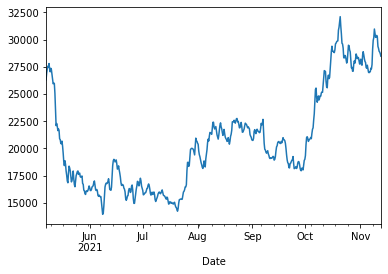

In [61]:
index_results1 = pd.DataFrame(index_tokens.values*markdom_result.values, columns=markdom_result.columns, index=index_tokens.index)
index_results1['SUM'] = (index_results1['BTC']+index_results1['DOT']+index_results1['ETH']+index_results1['ADA']+index_results1['DOGE']+
                         index_results1['LINK']+index_results1['UNI']+index_results1['XRP']+index_results1['BNB']+index_results1['LTC']+
                         index_results1['USDT']+index_results1['SOL']+index_results1['LUNA']+index_results1['AVAX']+index_results1['ALGO']+
                         index_results1['BCH']+index_results1['MATIC']+index_results1['VET']+index_results1['XLM'])
ax = index_results1['SUM'].plot()


In [62]:
btc_weight = 0.50749
dot_weight = 0.01924
eth_weight = 0.23604
ada_weight= 0.02868
doge_weight = 0.01440
ltc_weight = 0.00779
bnb_weight = 0.04367
xrp_weight = 0.02372
uni_weight = 0.00661
link_weight = 0.00661
usdt_weight = 0.03069
sol_weight = 0.02927
luna_weight = 0.00968
avax_weight = 0.00803
algo_weight = 0.00590
bch_weight = 0.00531
matic_weight = 0.00496
vet_weight = 0.00437
xlm_weight = 0.00389

In [63]:
index_returns = (btc_weight*index_tokens['BTC Median']+dot_weight*index_tokens['DOT Median']+
                 eth_weight*index_tokens['ETH Median']+ada_weight*index_tokens['ADA Median']+
                 doge_weight*index_tokens['DOGE Median']+ltc_weight*index_tokens['LTC Median']+
                 bnb_weight*index_tokens['BNB Median']+xrp_weight*index_tokens['XRP Median']+
                 uni_weight*index_tokens['UNI Median']+link_weight*index_tokens['LINK Median']+
                 usdt_weight*index_tokens['USDT Median']+sol_weight*index_tokens['SOL Median']+
                 luna_weight*index_tokens['LUNA Median']+avax_weight*index_tokens['AVAX Median']+
                 algo_weight*index_tokens['ALGO Median']+bch_weight*index_tokens['BCH Median']+
                 matic_weight*index_tokens['MATIC Median']+vet_weight*index_tokens['VET Median']+
                 xlm_weight*index_tokens['XLM Median'])

<AxesSubplot:xlabel='Date'>

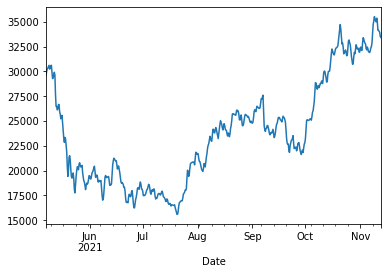

In [64]:
index_returns.plot(kind='line')

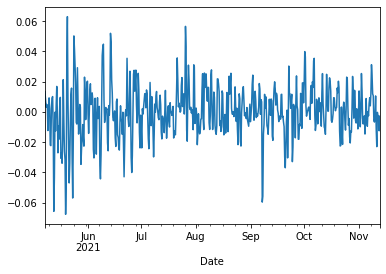

In [65]:
index_pct = index_returns.pct_change().dropna()
index_pct.plot();

***_MEME/GAMING TOKENS_***

In [ ]:
doge = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=DOGE-USDT&startAt=1620360000&endAt=0')
doge_j = doge.json()
doge_j

In [ ]:
elon = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=ELON-USDT&startAt=1620360000&endAt=0')
elon_j = elon.json()
elon_j

***_DEFI TOKENS_***

In [ ]:
uni = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=UNI-USDT&startAt=1620360000&endAt=0')
uni_j = uni.json()
uni_j

In [ ]:
luna = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=LUNA-USDT&startAt=1620360000&endAt=0')
luna_j = luna.json()
luna_j

In [ ]:
avax = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=AVAX-USDT&startAt=1620360000&endAt=0')
avax_j = avax.json()
avax_j

***_STORAGE TOKENS_***

In [ ]:
fil = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=FIL-USDT&startAt=1620360000')
fil_j = fil.json()
fil_j

In [ ]:
btt = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=BTT-USDT&startAt=1620360000')
btt_j = btt.json()
btt_j

In [ ]:
storj = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=STORJ-USDT&startAt=1620360000')
storj_j = storj.json()
storj_j